In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,NaN,1.9789,NaN,2.88660,2.46960,0.21541,3.09000,0.78343,NaN,0.03043,0.100660
1,0.029389,0.206580,NaN,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,NaN,3.844500
2,NaN,0.217560,1.6105,1.33710,NaN,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,NaN,0.33278,0.19027,0.56716,1.66010,NaN,0.66126,3.13510,NaN,3.734600
4,-0.268400,-1.006000,NaN,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,NaN,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,3.7258,3.70480,0.88269,0.35406,1.62780,NaN,1.08500,0.15740,0.46504,NaN
396,0.264630,-6.107600,3.9054,1.33770,1.41870,NaN,1.09510,3.79360,0.12790,0.54249,NaN,NaN
397,NaN,-1.993300,1.3248,1.77210,2.55090,1.47010,NaN,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.4948,NaN,2.99900,3.41010,NaN,0.27800,0.99059,3.43740,NaN,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	65
float64		column 2	78
float64		column 3	131
float64		column 4	66
float64		column 5	53
float64		column 6	78
float64		column 7	52
float64		column 8	92
float64		column 9	79
float64		column 10	78
float64		column 11	91
float64		column 12	79


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,335.000000,322.000000,269.000000,334.000000,347.000000,322.000000,348.000000,308.000000,321.000000,322.000000,309.000000,321.000000
mean,0.024874,0.066370,2.058126,1.903547,1.945770,1.977601,2.041047,1.950121,1.954822,1.996625,1.956733,1.966024
std,2.370517,2.511156,1.021119,1.126175,1.127439,1.081420,1.125446,1.067633,1.086695,1.090591,1.083127,1.138682
min,-6.673100,-6.828400,0.005583,0.011551,0.000530,0.018503,0.003618,0.007321,0.007365,0.067105,0.006786,0.001972
25%,-0.561210,-0.718070,1.360100,0.983798,0.942365,1.121875,1.093125,1.150925,1.130100,1.065025,1.066200,1.002100
50%,-0.056236,0.001683,2.101000,1.792600,1.941200,2.053100,2.106650,1.873750,1.970900,2.052700,1.902000,1.904900
75%,0.727995,0.768242,2.782300,2.767575,2.913050,2.870675,2.914000,2.832225,2.775800,2.951825,2.881300,2.895900
max,8.409300,6.777100,3.976400,3.993400,3.971200,3.959200,3.996300,3.994400,3.985500,3.984300,3.930600,3.996000


<AxesSubplot:>

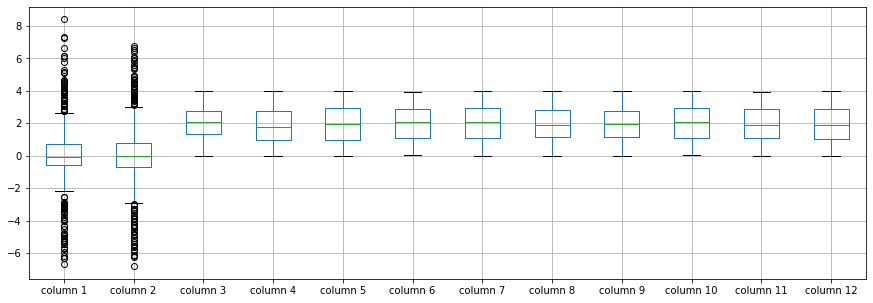

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.024874
column 2     0.066370
column 3     2.058126
column 4     1.903547
column 5     1.945770
column 6     1.977601
column 7     2.041047
column 8     1.950121
column 9     1.954822
column 10    1.996625
column 11    1.956733
column 12    1.966024
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.037181,-0.065067,-0.086105,-0.020606,0.017230,-0.008981,0.025006,-0.025606,0.037625,0.058229,-0.078506
column 2,0.037181,1.000000,-0.049515,0.049753,-0.064984,-0.092989,-0.020708,-0.002227,0.067196,0.002063,-0.039154,0.027495
column 3,-0.065067,-0.049515,1.000000,-0.022976,0.034753,-0.077196,-0.014723,0.125007,0.054443,0.038741,-0.007890,0.004705
column 4,-0.086105,0.049753,-0.022976,1.000000,-0.009974,0.032029,-0.030650,0.070313,-0.003219,0.124864,-0.141961,-0.051089
column 5,-0.020606,-0.064984,0.034753,-0.009974,1.000000,-0.025968,0.022720,-0.058489,0.019700,-0.022468,0.030315,-0.054768
column 6,0.017230,-0.092989,-0.077196,0.032029,-0.025968,1.000000,-0.022989,0.015649,-0.041156,0.019064,0.006052,0.002163
column 7,-0.008981,-0.020708,-0.014723,-0.030650,0.022720,-0.022989,1.000000,-0.082551,0.064868,0.002180,0.053121,-0.049247
column 8,0.025006,-0.002227,0.125007,0.070313,-0.058489,0.015649,-0.082551,1.000000,-0.065953,-0.152293,-0.155623,0.061917
column 9,-0.025606,0.067196,0.054443,-0.003219,0.019700,-0.041156,0.064868,-0.065953,1.000000,0.041975,-0.035762,0.045693
column 10,0.037625,0.002063,0.038741,0.124864,-0.022468,0.019064,0.002180,-0.152293,0.041975,1.000000,-0.047181,-0.056345


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+90,12+90+90,12+90+90+90,12+90+90+90+90,12+90+90+90+90+90,12+90+90+90+90+90+90,12+90+90+90+90+90+90+90,12+90+90+90+90+90+90,12+90+90+90+90+90,12+90+90+90+90,12+90+90+90,12+90+90,12+90,12], vae_layer = False, seed = 90)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 21.79073600769043
Epoch: 1 , loss: 21.584479217529296
Epoch: 2 , loss: 20.028732261657716
Epoch: 3 , loss: 18.915879516601564
Epoch: 4 , loss: 18.67231132507324
Epoch: 5 , loss: 18.540706596374513
Epoch: 6 , loss: 18.42834747314453
Epoch: 7 , loss: 18.24705291748047
Epoch: 8 , loss: 18.070422439575196
Epoch: 9 , loss: 17.79367443084717
Epoch: 10 , loss: 17.55739219665527
Epoch: 11 , loss: 17.538802490234374
Epoch: 12 , loss: 17.158321456909178
Epoch: 13 , loss: 17.141995239257813
Epoch: 14 , loss: 16.868571739196778
Epoch: 15 , loss: 16.925302352905273
Epoch: 16 , loss: 16.45380531311035
Epoch: 17 , loss: 16.109545364379883
Epoch: 18 , loss: 16.111882400512695
Epoch: 19 , loss: 15.819962463378907
Epoch: 20 , loss: 15.808285942077637
Epoch: 21 , loss: 15.668834800720214
Epoch: 22 , loss: 15.468799095153809
Epoch: 23 , loss: 15.540717582702637
Epoch: 24 , loss: 15.462913093566895
Epoch: 25 , loss: 15.353

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.705950
column 2     0.128930
column 3     1.585292
column 4     2.136200
column 5     2.148600
column 6     2.245800
column 7     3.727700
column 8     2.227200
column 9     1.943500
column 10    1.987000
column 11    2.470700
column 12    0.368260
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,-0.028165,0.000000,-0.846519,0.000000,0.000000,0.000000,0.000000,0.0,0.501446,0.000000,0.000000
1,0.000000,0.000000,1.397291,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.634282,0.000000
2,1.117068,0.000000,0.000000,0.000000,-1.673934,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,2.655196,0.000000,0.000000,0.000000,0.000000,0.702404,0.0,0.000000,-1.101126,0.000000
4,0.000000,0.000000,-1.448221,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-2.234137,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.722172,4.729838,0.000000,0.000000,0.000000,0.000000,0.000000,-0.232570,0.0,0.000000,0.000000,0.149924
396,0.000000,0.000000,0.000000,0.000000,0.000000,1.868161,0.000000,0.000000,0.0,0.000000,0.085653,-0.262494
397,3.456646,0.000000,0.000000,0.000000,0.000000,0.000000,0.075596,0.000000,0.0,0.000000,0.000000,0.000000
398,0.000000,0.000000,0.000000,1.366479,0.000000,0.000000,-1.114498,0.000000,0.0,0.000000,-0.230761,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(61.02954543936002, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.37378498132427396

In [18]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     0.961262
column 4     1.187200
column 5     0.843910
column 6     2.583000
column 7     2.830600
column 8     3.074200
column 9     1.538100
column 10    0.246200
column 11    0.853340
column 12    0.905239
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.014320,1.978900,0.989781,2.886600,2.469600,0.215410,3.090000,0.78343,1.011796,0.030430,0.100660
1,0.029389,0.206580,1.885901,1.434300,3.129900,1.277800,1.428500,0.143330,1.19480,2.131800,1.619012,3.844500
2,0.001668,0.217560,1.610500,1.337100,2.094266,1.210000,3.996300,2.217300,3.90290,1.514400,2.438900,0.633580
3,-0.539160,-0.061874,3.020056,0.332780,0.190270,0.567160,1.660100,3.055104,0.66126,3.135100,2.836974,3.734600
4,-0.268400,-1.006000,1.433979,1.561600,3.201400,3.377400,1.522600,0.984750,3.10940,1.422263,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.144928,0.000638,3.725800,3.704800,0.882690,0.354060,1.627800,3.061430,1.08500,0.157400,0.465040,3.001324
396,0.264630,-6.107600,3.905400,1.337700,1.418700,3.554261,1.095100,3.793600,0.12790,0.542490,3.451453,3.493106
397,-0.022454,-1.993300,1.324800,1.772100,2.550900,1.470100,1.000996,1.841100,3.47730,0.954960,1.526300,2.123800
398,7.293000,-0.411470,2.494800,1.763029,2.999000,3.410100,1.837102,0.278000,0.99059,3.437400,1.585439,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NN_20(imp).xlsx", index=False, header=False)